In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [63]:
imsz = 256
b_size = 32
chann = 3

In [17]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "POTATO DATASET",
    shuffle = True,
    image_size = (imsz,imsz),
    batch_size = b_size
)

Found 2152 files belonging to 3 classes.


In [19]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [23]:
len(dataset)

# EVERY ELEMENT IN THE DATASET IS A BATCH OF 32 IMAGES

# 68*32 = 2176
# IN TOP, Found 2152 files belonging to 3 classes

68

In [30]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    # RETURNS TENSOR, SO CONVERTING TO NUMPY

# (32, 256, 256, 3)
# HERE 32 IS THE BATCH SIZE, 256*256 IS THE IMAGE SIZE, 3 IS THE NUMBER OF CHANNELS

(32, 256, 256, 3)
[0 0 1 2 1 1 0 0 0 1 2 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0]


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
# IMAGE IS ALSO A TENSOR, SO NUMPY


[[[151. 141. 150.]
  [151. 141. 150.]
  [151. 141. 150.]
  ...
  [143. 131. 141.]
  [130. 118. 128.]
  [150. 138. 148.]]

 [[156. 146. 155.]
  [154. 144. 153.]
  [158. 148. 157.]
  ...
  [149. 137. 147.]
  [138. 126. 136.]
  [156. 144. 154.]]

 [[159. 149. 158.]
  [152. 142. 151.]
  [161. 151. 160.]
  ...
  [143. 131. 141.]
  [134. 122. 132.]
  [147. 135. 145.]]

 ...

 [[156. 144. 154.]
  [155. 143. 153.]
  [154. 142. 152.]
  ...
  [145. 131. 144.]
  [145. 131. 144.]
  [146. 132. 145.]]

 [[155. 143. 153.]
  [155. 143. 153.]
  [154. 142. 152.]
  ...
  [145. 131. 144.]
  [145. 131. 144.]
  [146. 132. 145.]]

 [[154. 142. 152.]
  [154. 142. 152.]
  [153. 141. 151.]
  ...
  [145. 131. 144.]
  [145. 131. 144.]
  [145. 131. 144.]]]


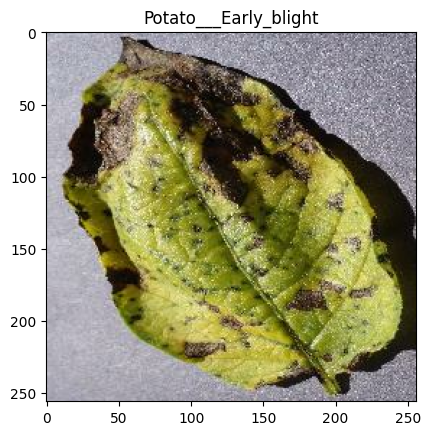

In [44]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [45]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [49]:
train_dataset = dataset.take(54)
test_dataset = dataset.skip(54)

val_size = 0.1

len(dataset)*val_size

6.800000000000001

In [50]:
val_dataset = test_dataset.take(6)
test_dataset = test_dataset.skip(6)

In [51]:
def get_train_test_eval_dataset(datasets, train_size=0.8, val_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):
    assert (train_size + test_size + val_size) == 1
    
    ds_size = len(datasets)
    
    if shuffle:
        datasets = datasets.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_size * ds_size)
    val_size = int(val_size * ds_size)
    
    train_dataset = datasets.take(train_size)    
    val_dataset = datasets.skip(train_size).take(val_size)
    test_dataset = datasets.skip(train_size).skip(val_size)
    
    return train_dataset, val_dataset, test_dataset

In [53]:
train_dataset, val_dataset, test_dataset = get_train_test_eval_dataset(dataset)

In [55]:
print("LENGTH OF TRAIN DATASET : ",len(train_dataset))
print("LENGTH OF TEST DATASET : ",len(test_dataset))
print("LENGTH OF EVAL DATASET : ",len(val_dataset))

LENGTH OF TRAIN DATASET :  54
LENGTH OF TEST DATASET :  8
LENGTH OF EVAL DATASET :  6


In [56]:
train_dataset = train_dataset.cache().shuffle(1000)
test_dataset = test_dataset.cache().shuffle(1000)
val_dataset = val_dataset.cache().shuffle(1000)

In [57]:
resize_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(imsz,imsz),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [60]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [66]:
potato_model = tf.keras.Sequential([
    resize_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape = (b_size,imsz,imsz,chann)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")

])

potato_model.build(input_shape=(b_size,imsz,imsz,chann))
potato_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [67]:
potato_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [68]:
history_rec = potato_model.fit(
    train_dataset,
    epochs=50,
    batch_size=b_size,
    verbose=1,
    validation_data=val_datasets
)

Epoch 1/50
54/54 [==============================] - 75s 1s/step - loss: 0.8912 - accuracy: 0.4971 - val_loss: 0.7542 - val_accuracy: 0.5521
Epoch 2/50
54/54 [==============================] - 70s 1s/step - loss: 0.6779 - accuracy: 0.7286 - val_loss: 0.6318 - val_accuracy: 0.6979
Epoch 3/50
54/54 [==============================] - 72s 1s/step - loss: 0.4611 - accuracy: 0.8015 - val_loss: 0.4470 - val_accuracy: 0.8452
Epoch 4/50
54/54 [==============================] - 74s 1s/step - loss: 0.2955 - accuracy: 0.8767 - val_loss: 0.3176 - val_accuracy: 0.8698
Epoch 5/50
54/54 [==============================] - 89s 2s/step - loss: 0.2417 - accuracy: 0.9132 - val_loss: 0.2510 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 76s 1s/step - loss: 0.2024 - accuracy: 0.9190 - val_loss: 0.3244 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 75s 1s/step - loss: 0.1988 - accuracy: 0.9248 - val_loss: 0.3002 - val_accuracy: 0.8594
Epoch 8/50
54/54 [==

In [69]:
potato_model.evaluate(test_dataset)

8/8 [==============================] - 4s 322ms/step - loss: 0.3037 - accuracy: 0.9219


[0.30366092920303345, 0.921875]

In [70]:
history_rec

In [71]:
history_rec.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [72]:
history_rec.history

{'loss': [0.8912208676338196,
  0.6779091954231262,
  0.46111470460891724,
  0.2955489456653595,
  0.2416561096906662,
  0.20242439210414886,
  0.19881589710712433,
  0.19013798236846924,
  0.13197208940982819,
  0.10437356680631638,
  0.15803280472755432,
  0.10323642194271088,
  0.1250942349433899,
  0.12694887816905975,
  0.07563146948814392,
  0.08460859954357147,
  0.09034561365842819,
  0.05349604785442352,
  0.060509804636240005,
  0.06514357030391693,
  0.06647022813558578,
  0.030695153400301933,
  0.03243305906653404,
  0.029672566801309586,
  0.036503370851278305,
  0.02726338990032673,
  0.023848460987210274,
  0.03236024081707001,
  0.04865812510251999,
  0.03652593865990639,
  0.040163666009902954,
  0.06468909233808517,
  0.05136043578386307,
  0.018461434170603752,
  0.033617906272411346,
  0.03290934860706329,
  0.031264323741197586,
  0.04324161633849144,
  0.037146225571632385,
  0.0531240850687027,
  0.03216107189655304,
  0.02517239935696125,
  0.02099958434700966,

In [73]:
history_rec.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [74]:
history_rec.history['accuracy']

[0.49710649251937866,
 0.7285879850387573,
 0.8015046119689941,
 0.8767361044883728,
 0.9131944179534912,
 0.9189814925193787,
 0.9247685074806213,
 0.9322916865348816,
 0.9490740895271301,
 0.9618055820465088,
 0.9421296119689941,
 0.9641203880310059,
 0.9525462985038757,
 0.9490740895271301,
 0.9728009104728699,
 0.9699074029922485,
 0.9670138955116272,
 0.9820601940155029,
 0.9756944179534912,
 0.9820601940155029,
 0.9780092835426331,
 0.9907407164573669,
 0.9901620149612427,
 0.9907407164573669,
 0.9878472089767456,
 0.9930555820465088,
 0.9918981194496155,
 0.9872685074806213,
 0.9820601940155029,
 0.9855324029922485,
 0.9849537014961243,
 0.9751157164573669,
 0.9803240895271301,
 0.9947916865348816,
 0.9890046119689941,
 0.9878472089767456,
 0.9872685074806213,
 0.984375,
 0.9861111044883728,
 0.9768518805503845,
 0.9890046119689941,
 0.9918981194496155,
 0.9924768805503845,
 0.9959490895271301,
 0.9988425970077515,
 0.9924768805503845,
 0.9965277910232544,
 0.9895833134651184,
 

In [75]:
accuracy_pm = history_rec.history['accuracy']
loss_pm = history_rec.history['loss']
val_accuracy_pm = history_rec.history['val_accuracy']
val_loss_pm = history_rec.history['val_loss']

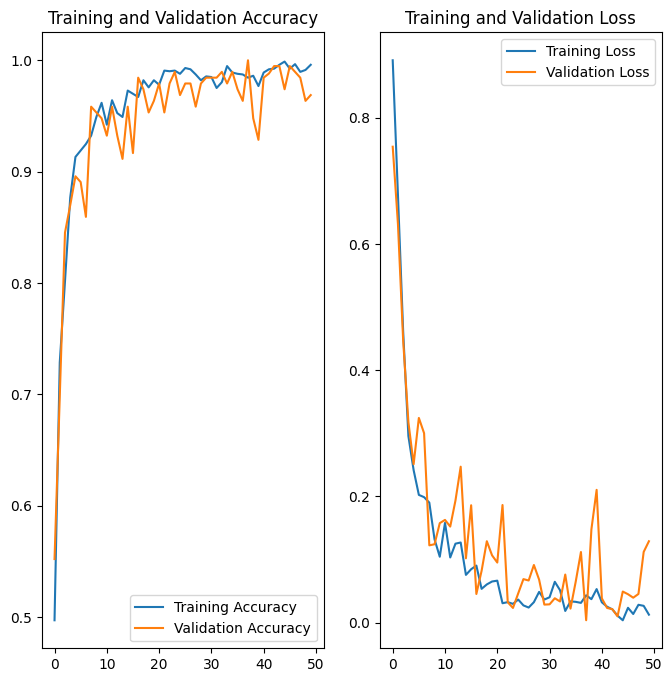

In [76]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), accuracy_pm, label='Training Accuracy')
plt.plot(range(50), val_accuracy_pm, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss_pm, label='Training Loss')
plt.plot(range(50), val_loss_pm, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 34ms/step
PREDICTED CONDITION :  Potato___Early_blight


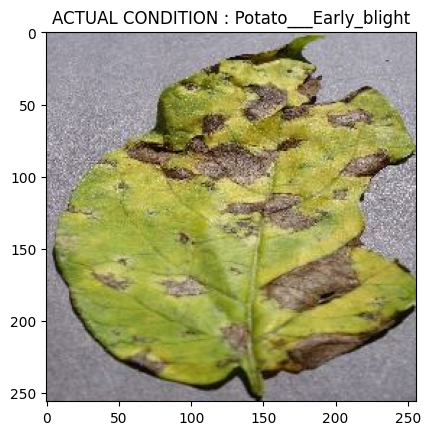

In [130]:
import numpy as np

for image_batch, label_batch in test_dataset.take(1):

    f_image = image_batch[0].numpy().astype("uint8")
    f_label = label_batch[0]

    plt.imshow(f_image)
    plt.title(f"ACTUAL CONDITION : {class_names[f_label]}")

    p_image = tf.expand_dims(image_batch[0],0)

    batch_predict = potato_model.predict(p_image)
    print("PREDICTED CONDITION : ",class_names[np.argmax(batch_predict[0])])

1/1 [==============================] - 0s 31ms/step
PREDICTED CONDITION :  Potato___Early_blight


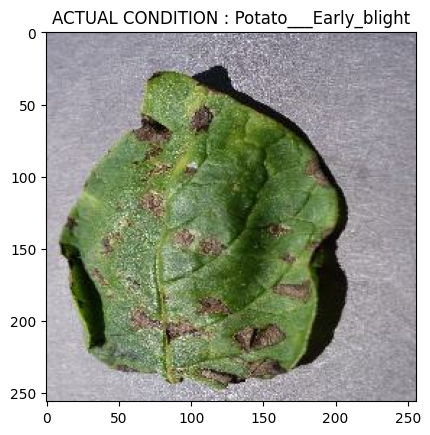

In [124]:
for image_batch, label_batch in test_dataset.take(1):

    f_image = image_batch[0].numpy().astype("uint8")
    f_label = label_batch[0]

    plt.imshow(f_image)
    plt.title(f"ACTUAL CONDITION : {class_names[f_label]}")

    p_image = tf.expand_dims(image_batch[0],0)

    batch_predict = potato_model.predict(p_image)
    print("PREDICTED CONDITION : ",class_names[np.argmax(batch_predict[0])])

1/1 [==============================] - 0s 29ms/step
PREDICTED CONDITION :  Potato___Late_blight


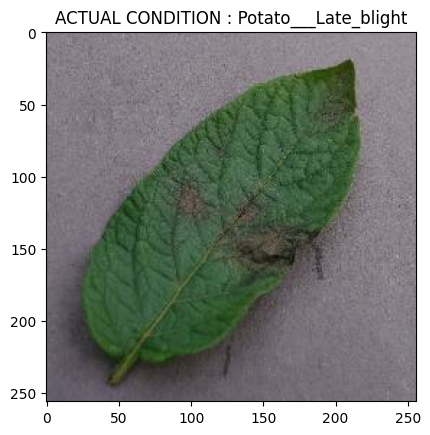

In [122]:
for image_batch, label_batch in test_dataset.take(1):

    f_image = image_batch[0].numpy().astype("uint8")
    f_label = label_batch[0]

    plt.imshow(f_image)
    plt.title(f"ACTUAL CONDITION : {class_names[f_label]}")

    p_image = tf.expand_dims(image_batch[0],0)

    batch_predict = potato_model.predict(p_image)
    print("PREDICTED CONDITION : ",class_names[np.argmax(batch_predict[0])])

1/1 [==============================] - 0s 30ms/step
PREDICTED CONDITION :  Potato___healthy


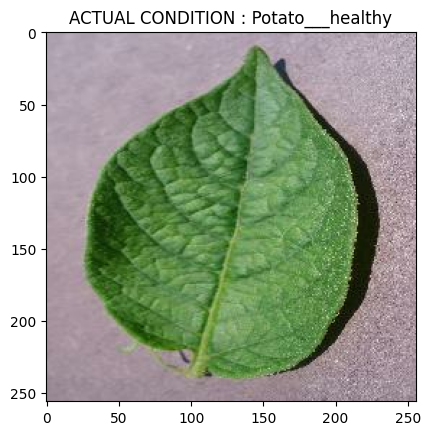

In [121]:
for image_batch, label_batch in test_dataset.take(1):

    f_image = image_batch[0].numpy().astype("uint8")
    f_label = label_batch[0]

    plt.imshow(f_image)
    plt.title(f"ACTUAL CONDITION : {class_names[f_label]}")

    p_image = tf.expand_dims(image_batch[0],0)

    batch_predict = potato_model.predict(p_image)
    print("PREDICTED CONDITION : ",class_names[np.argmax(batch_predict[0])])

1/1 [==============================] - 0s 34ms/step


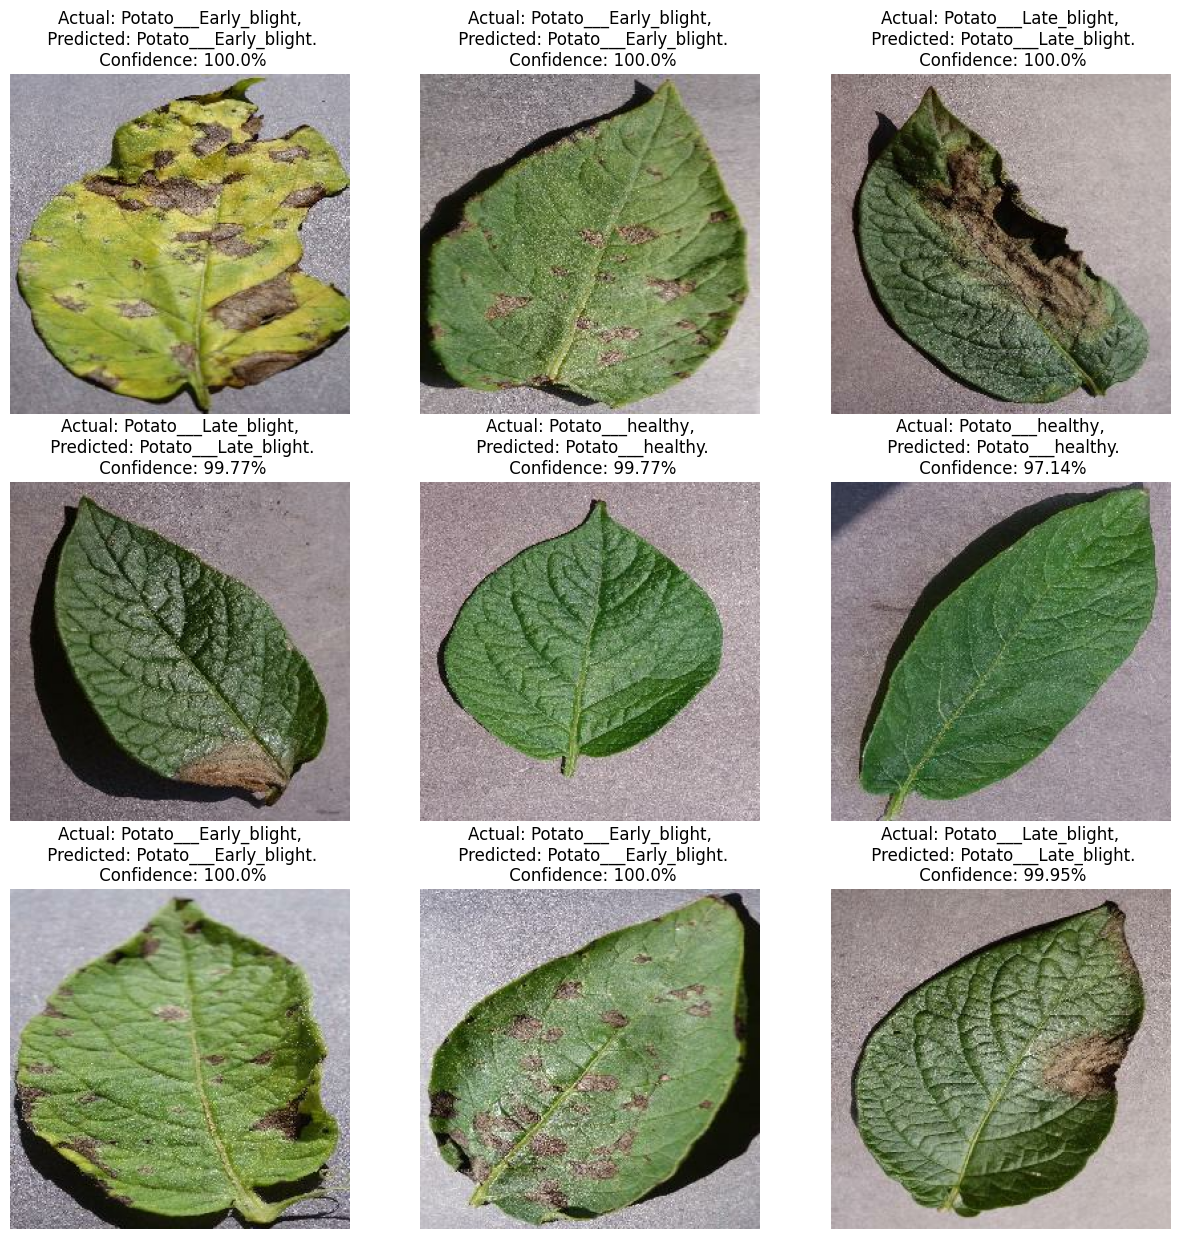

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        IMG = images[i].numpy()
        plt.imshow(IMG.astype("uint8"))

        img_array = tf.expand_dims(IMG, 0)

        predictions = potato_model.predict(img_array)

        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [87]:
model_version = 1
potato_model.save(f"./models/{1}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets
